### Topik Case:

**Clustering Nasabah Berdasarkan Pola Pengeluaran dan Preferensi Transaksi**

### Tujuan:

Mengelompokkan nasabah berdasarkan kebiasaan transaksi mereka untuk mendapatkan insight bisnis, misalnya:

* Preferensi kanal transaksi (Online, ATM, Branch).
* Pola pengeluaran (besar/kecil, rutin/sesekali).
* Preferensi merchant atau lokasi transaksi.
* Hubungan antara demografi (usia, pekerjaan) dengan pola transaksi.

### Fitur Utama:

1. **TransactionAmount** – rata-rata dan variasi pengeluaran.
2. **TransactionType** – proporsi debit vs kredit.
3. **Channel** – distribusi penggunaan kanal transaksi.
4. **MerchantID & Location** – preferensi merchant dan lokasi transaksi.
5. **AccountBalance** – pola saldo pasca-transaksi.
6. **CustomerAge & CustomerOccupation** – demografi yang mempengaruhi kebiasaan transaksi.
7. **TransactionDuration** – lama transaksi, bisa menunjukkan preferensi proses cepat vs lambat.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
df = pd.read_csv("../data/01_raw/bank_transactions_data_2.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [6]:
df_main_features = df[
    [
    "TransactionAmount",
    "TransactionType",
    "Channel",
    "MerchantID",
    "Location",
    "AccountBalance",
    "CustomerAge",
    "CustomerOccupation",
    "TransactionDuration"
]
]

In [7]:
df_main_features.sample(5)

,TransactionAmount,TransactionType,Channel,MerchantID,Location,AccountBalance,CustomerAge,CustomerOccupation,TransactionDuration
1116,122.35,Credit,Branch,M008,Atlanta,6472.50,53,Retired,188
526,345.81,Debit,Branch,M099,Raleigh,6116.80,40,Engineer,135
1611,35.94,Credit,Branch,M050,Fresno,1697.28,23,Student,141
2035,72.82,Debit,Online,M063,Houston,6911.62,68,Doctor,127
2390,136.31,Debit,Online,M055,Nashville,4384.95,74,Retired,65


In [8]:
df_main_features.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Channel              2512 non-null   object 
 3   MerchantID           2512 non-null   object 
 4   Location             2512 non-null   object 
 5   AccountBalance       2512 non-null   float64
 6   CustomerAge          2512 non-null   int64  
 7   CustomerOccupation   2512 non-null   object 
 8   TransactionDuration  2512 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 176.8+ KB


ada beberapa yang tidak sesuai tipe data nya
1. transaction date masih object
2. previous transactionDate masih object

akan kita fix dulu untuk kebutuhan EDA

In [ ]:
# df_main_features["TransactionDate"] = pd.to_datetime(df_main_features["TransactionDate"])
# df_main_features["PreviousTransactionDate"] = pd.to_datetime(df_main_features["PreviousTransactionDate"])

/tmp/ipykernel_22671/3460292927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_features["TransactionDate"] = pd.to_datetime(df_main_features["TransactionDate"])
/tmp/ipykernel_22671/3460292927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_features["PreviousTransactionDate"] = pd.to_datetime(df_main_features["PreviousTransactionDate"])


In [9]:
df_main_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Channel              2512 non-null   object 
 3   MerchantID           2512 non-null   object 
 4   Location             2512 non-null   object 
 5   AccountBalance       2512 non-null   float64
 6   CustomerAge          2512 non-null   int64  
 7   CustomerOccupation   2512 non-null   object 
 8   TransactionDuration  2512 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 176.8+ KB


In [10]:
df_main_features.isnull().sum()

TransactionAmount      0
TransactionType        0
Channel                0
MerchantID             0
Location               0
AccountBalance         0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
dtype: int64

In [11]:
df_main_features.duplicated().sum()

0

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [12]:
df_main_features_numerical = df_main_features.select_dtypes(include=["float64", "int64"])
df_main_features_categorical = df_main_features.select_dtypes(include=["object"])

In [13]:
df_main_features_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   AccountBalance       2512 non-null   float64
 2   CustomerAge          2512 non-null   int64  
 3   TransactionDuration  2512 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 78.6 KB


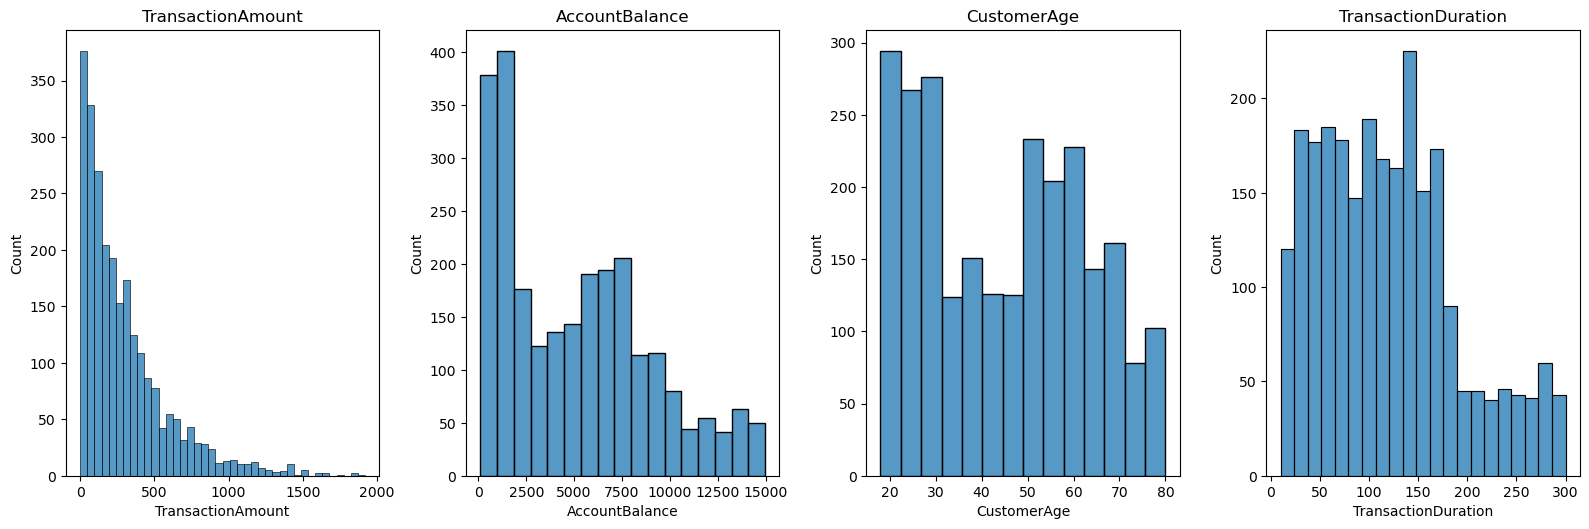

In [14]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_main_features_numerical.columns):
    ax = fig.add_subplot(2, 5, i + 1)
    sns.histplot(x=df_main_features_numerical[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

ada beberap data yang skew/miring, seperti :
1. transcation amount yang ternyata miring ke kanan
2. account balance yang ternyata miring ke kanan juga
3. customer age juga sama

mendekati normal hanya transaction duration 

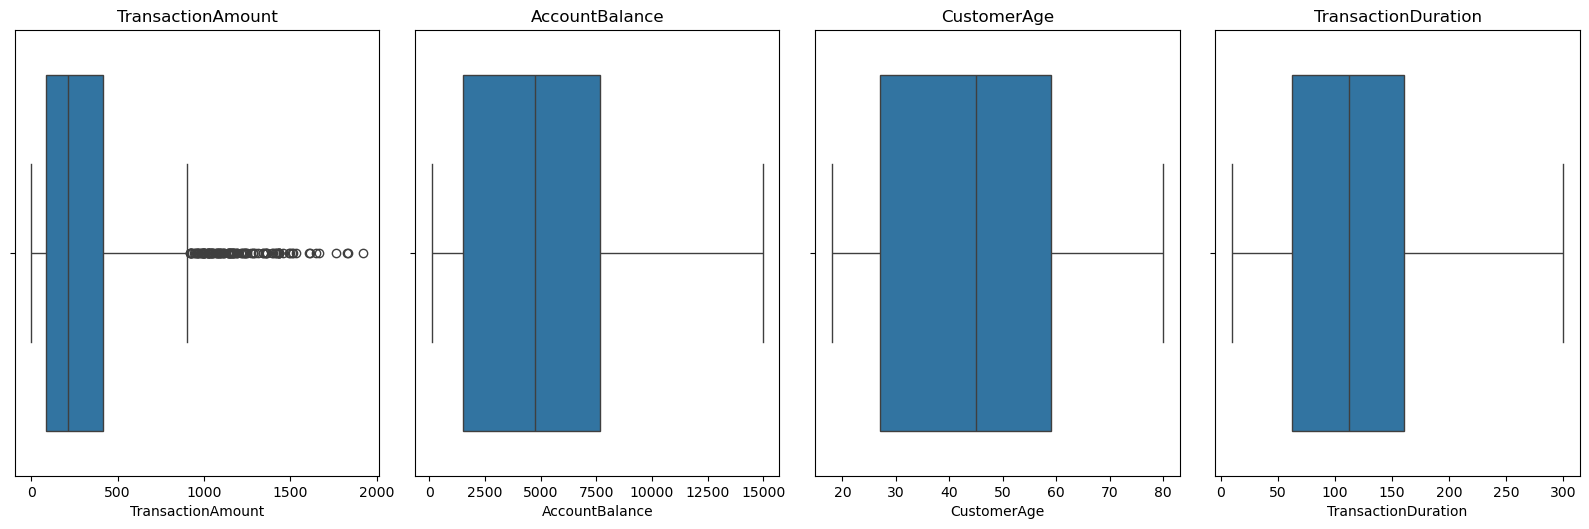

In [15]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_main_features_numerical.columns):
    ax = fig.add_subplot(2, 5, i + 1)
    sns.boxplot(x=df_main_features_numerical[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

dalam pengecekan outliers, ada satu column yang memiliki outliers, yaitu column transcation amount, mungkin nanti fix nya lebih ke arah mengganti ke nilai max terdekat, karna trade off nya data yang kecil hanya 2k baris

In [16]:
df_main_features_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TransactionType     2512 non-null   object
 1   Channel             2512 non-null   object
 2   MerchantID          2512 non-null   object
 3   Location            2512 non-null   object
 4   CustomerOccupation  2512 non-null   object
dtypes: object(5)
memory usage: 98.3+ KB


In [17]:
df_main_features_categorical["TransactionType"].value_counts()

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

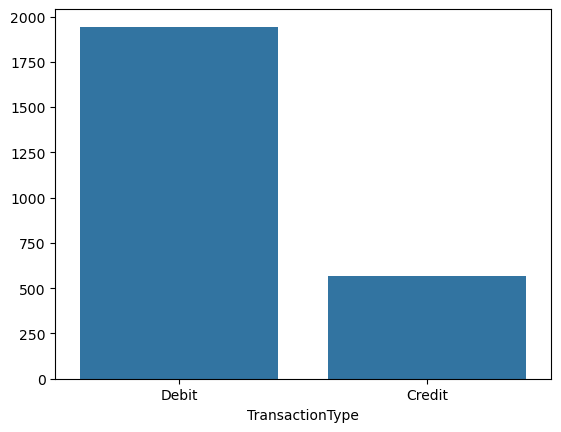

In [18]:
sns.barplot(x=df_main_features_categorical["TransactionType"].value_counts().index, 
            y=df_main_features_categorical["TransactionType"].value_counts().values
           )
plt.show()

distribusi transaksi kredit lebih besar daripada debit, masuk kategori data unbalance

In [19]:
df_main_features_categorical["Channel"].value_counts()

Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

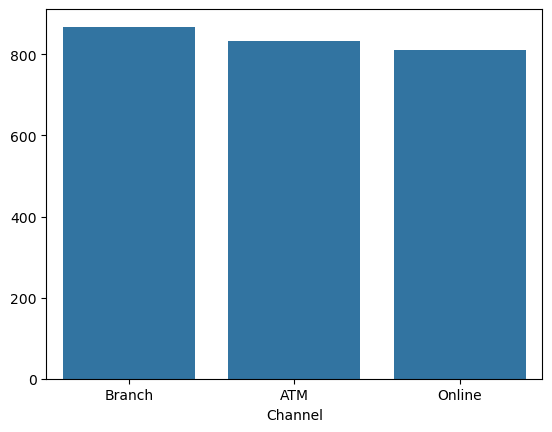

In [20]:
sns.barplot(
    x=df_main_features_categorical["Channel"].value_counts().index,
    y=df_main_features_categorical["Channel"].value_counts().values
)
plt.show()

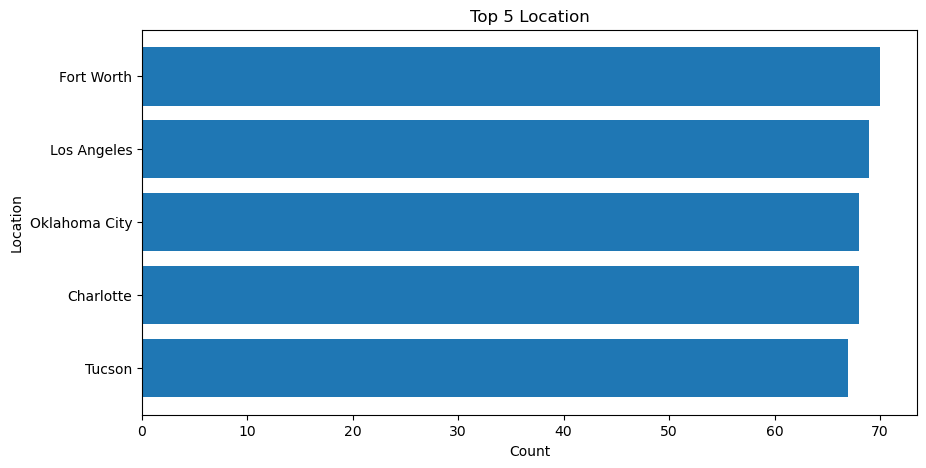

In [21]:
top5 = df_main_features_categorical["Location"].value_counts().head(5)

plt.figure(figsize=(10, 5))
plt.barh(top5.index[::-1], top5.values[::-1]) 
plt.xlabel("Count")
plt.ylabel("Location")
plt.title("Top 5 Location")
plt.show()

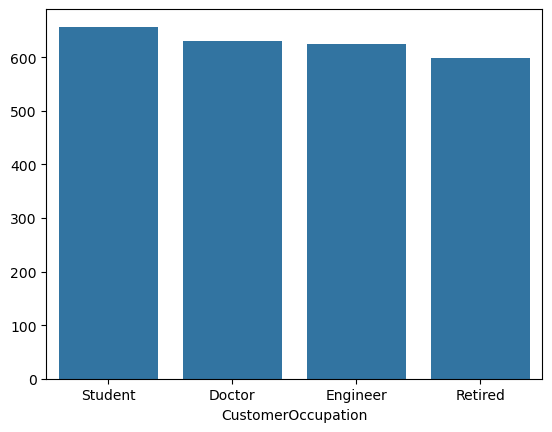

In [22]:
sns.barplot(
    x=df_main_features_categorical["CustomerOccupation"].value_counts().index,
    y=df_main_features_categorical["CustomerOccupation"].value_counts().values
)
plt.show()

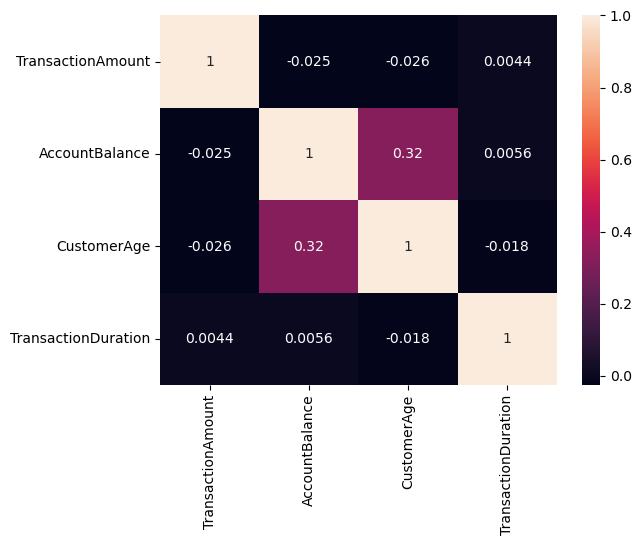

In [23]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
sns.heatmap(
    df_main_features_numerical.corr(),
    annot=True
)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


## Feature Engineering

In [25]:
df_main_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Channel              2512 non-null   object 
 3   MerchantID           2512 non-null   object 
 4   Location             2512 non-null   object 
 5   AccountBalance       2512 non-null   float64
 6   CustomerAge          2512 non-null   int64  
 7   CustomerOccupation   2512 non-null   object 
 8   TransactionDuration  2512 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 176.8+ KB


In [26]:
# 2. Rasio Amount/Balance (hindari division by zero)
df_main_features["AmountBalanceRatio"] = df_main_features["TransactionAmount"] / (df_main_features["AccountBalance"] + 1e-6)

/tmp/ipykernel_23407/3894120446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_features["AmountBalanceRatio"] = df_main_features["TransactionAmount"] / (df_main_features["AccountBalance"] + 1e-6)


In [27]:
# 3. Preferensi Merchant & Location (Top-N encoding)
N = 5  # contoh ambil top 5

# Top-N Merchant
top_merchants = df_main_features["MerchantID"].value_counts().head(N).index
df_main_features["MerchantTopN"] = df_main_features["MerchantID"].apply(
    lambda x: x if x in top_merchants else "OTHER"
)

# Top-N Location
top_locations = df_main_features["Location"].value_counts().head(N).index
df_main_features["LocationTopN"] = df_main_features["Location"].apply(
    lambda x: x if x in top_locations else "OTHER"
)


/tmp/ipykernel_23407/1977067285.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_features["MerchantTopN"] = df_main_features["MerchantID"].apply(
/tmp/ipykernel_23407/1977067285.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_features["LocationTopN"] = df_main_features["Location"].apply(


In [28]:
df_main_features.head()

,TransactionAmount,TransactionType,Channel,MerchantID,Location,AccountBalance,CustomerAge,CustomerOccupation,TransactionDuration,AmountBalanceRatio,MerchantTopN,LocationTopN
0,14.09,Debit,ATM,M015,San Diego,5112.21,70,Doctor,81,0.002756,OTHER,OTHER
1,376.24,Debit,ATM,M052,Houston,13758.91,68,Doctor,141,0.027345,OTHER,OTHER
2,126.29,Debit,Online,M009,Mesa,1122.35,19,Student,56,0.112523,OTHER,OTHER
3,184.50,Debit,Online,M002,Raleigh,8569.06,26,Student,25,0.021531,OTHER,OTHER
4,13.45,Credit,Online,M091,Atlanta,7429.40,26,Student,198,0.001810,OTHER,OTHER


In [29]:
df_main_features_numerical = df_main_features.select_dtypes(include=["float64", "int64"])
df_main_features_categorical = df_main_features.select_dtypes(include=["object"])

In [30]:
df_main_features_numerical.head()

,TransactionAmount,AccountBalance,CustomerAge,TransactionDuration,AmountBalanceRatio
0,14.09,5112.21,70,81,0.002756
1,376.24,13758.91,68,141,0.027345
2,126.29,1122.35,19,56,0.112523
3,184.50,8569.06,26,25,0.021531
4,13.45,7429.40,26,198,0.001810


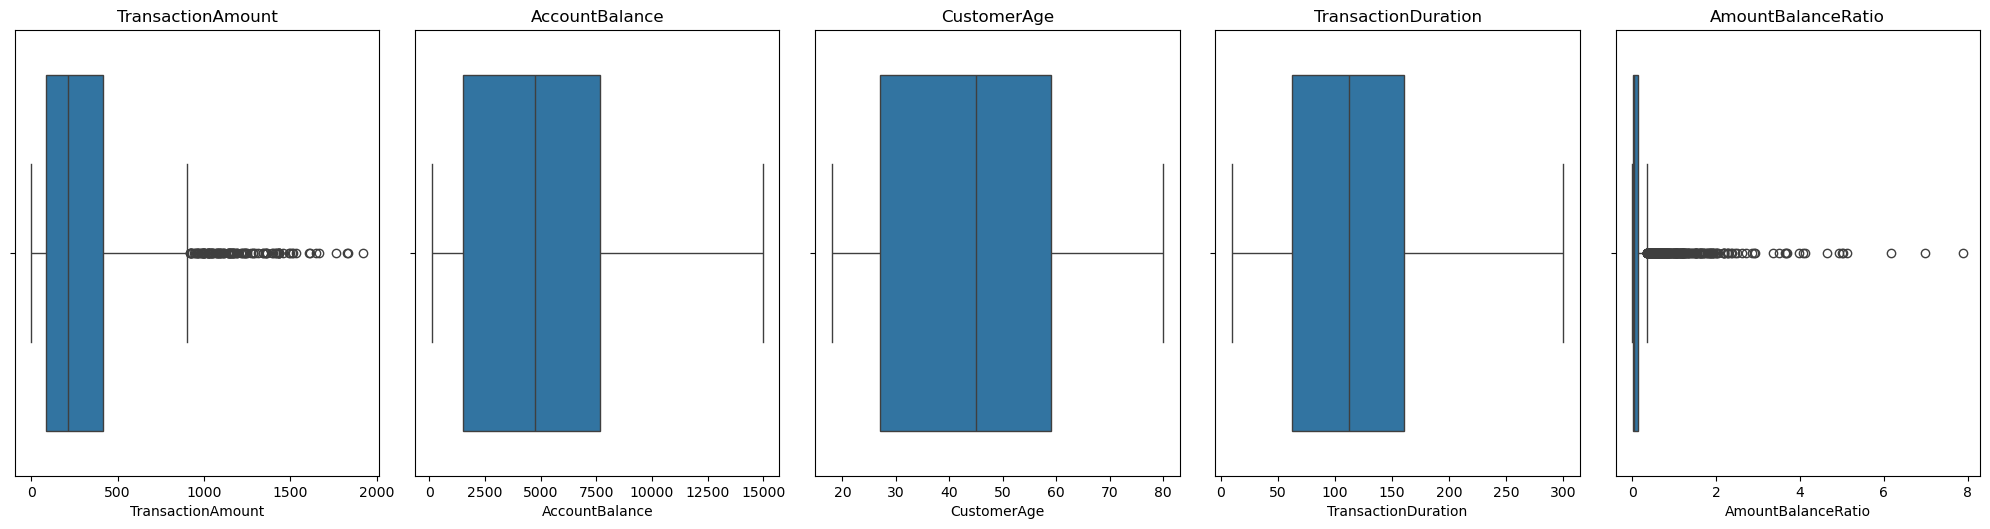

In [31]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_main_features_numerical.columns):
    ax = fig.add_subplot(2, 5, i + 1)
    sns.boxplot(x=df_main_features_numerical[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

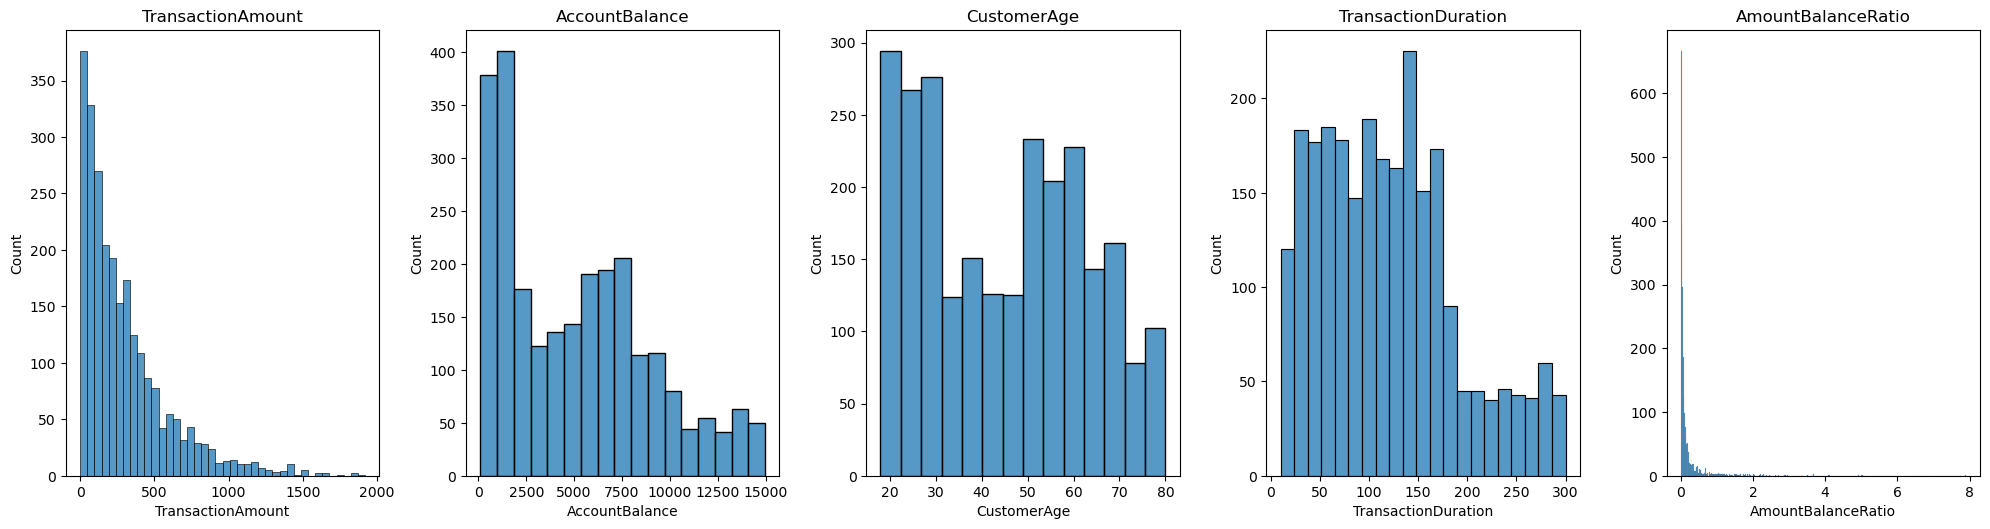

In [32]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_main_features_numerical.columns):
    ax = fig.add_subplot(2, 5, i + 1)
    sns.histplot(x=df_main_features_numerical[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [33]:
print("skew untuk transaksi amount:", df_main_features_numerical["TransactionAmount"].skew())
print("skew untuk AmountBalanceRatio:", df_main_features_numerical["AmountBalanceRatio"].skew())

skew untuk transaksi amount: 1.7401067216605806
skew untuk AmountBalanceRatio: 6.754363781321394


In [34]:
from sklearn.preprocessing import PowerTransformer
df_main_features_numerical['TransactionAmount_log'] = np.log1p(df_main_features_numerical['TransactionAmount'])
# TransactionAmount masih ada
pt = PowerTransformer(method='yeo-johnson')
df_main_features_numerical['AmountBalanceRatio_yj'] = pt.fit_transform(df_main_features_numerical[['AmountBalanceRatio']])

# AccountBalance masih ada

<Axes: xlabel='TransactionAmount_log', ylabel='Count'>

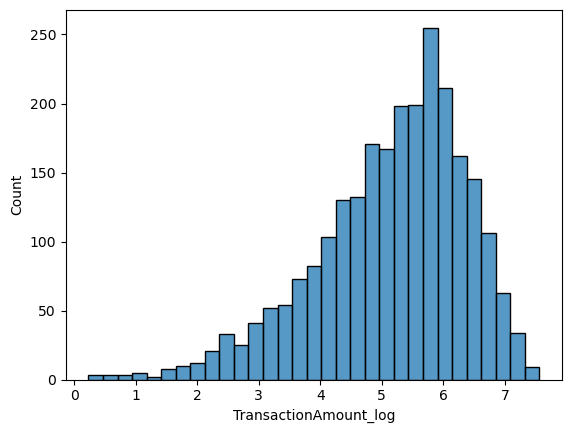

In [35]:
sns.histplot(x=df_main_features_numerical['TransactionAmount_log'])

<Axes: xlabel='AmountBalanceRatio_yj', ylabel='Count'>

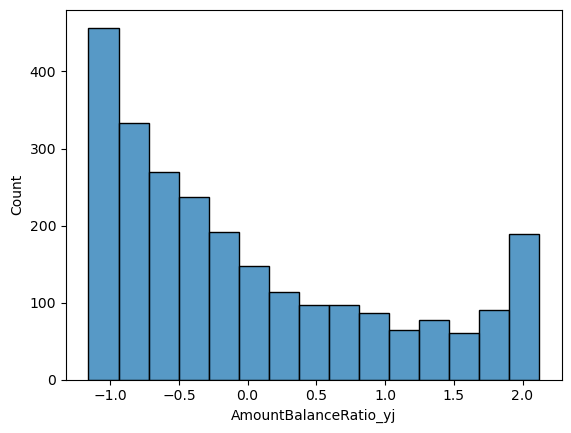

In [36]:
sns.histplot(x=df_main_features_numerical['AmountBalanceRatio_yj'])

In [37]:
df_main_features_numerical.head()

,TransactionAmount,AccountBalance,CustomerAge,TransactionDuration,AmountBalanceRatio,TransactionAmount_log,AmountBalanceRatio_yj
0,14.09,5112.21,70,81,0.002756,2.714032,-1.107502
1,376.24,13758.91,68,141,0.027345,5.932882,-0.683276
2,126.29,1122.35,19,56,0.112523,4.846468,0.356475
3,184.50,8569.06,26,25,0.021531,5.223055,-0.777374
4,13.45,7429.40,26,198,0.001810,2.670694,-1.125266


In [38]:
df_main_features_numerical = df_main_features_numerical.drop(["TransactionAmount", "AmountBalanceRatio"], axis=1)
df_main_features_numerical.head()

,AccountBalance,CustomerAge,TransactionDuration,TransactionAmount_log,AmountBalanceRatio_yj
0,5112.21,70,81,2.714032,-1.107502
1,13758.91,68,141,5.932882,-0.683276
2,1122.35,19,56,4.846468,0.356475
3,8569.06,26,25,5.223055,-0.777374
4,7429.40,26,198,2.670694,-1.125266


In [39]:
def handle_outliers_iqr(df, columns, k=1.5, method="remove"):
    """
    Deteksi & tangani outliers dengan metode IQR.
    
    Params:
    --------
    df : pd.DataFrame
        Dataframe input
    columns : list
        List nama kolom numerik
    k : float
        Faktor IQR (default = 1.5 → aturan standar)
    method : str
        - "detect" → return DataFrame hanya outliers
        - "remove" → return DataFrame tanpa outliers
        - "capping" → return DataFrame dengan outliers diganti
    
    Return:
    --------
    pd.DataFrame
    """
    df_copy = df.copy()
    mask = pd.Series(False, index=df.index)  # semua False dulu
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        
        if method == "capping":
            # Ganti nilai outlier dengan batas bawah/atas
            df_copy[col] = np.where(df[col] < lower, lower,
                             np.where(df[col] > upper, upper, df[col]))
        
        else:
            # Tandai outlier untuk detect/remove
            mask |= (df[col] < lower) | (df[col] > upper)
    
    if method == "detect":
        return df[mask]  # hanya outliers
    elif method == "remove":
        return df[~mask]  # data tanpa outliers
    elif method == "capping":
        return df_copy  # data dengan capping
    else:
        raise ValueError("method harus salah satu dari: 'detect', 'remove', 'capping'")

In [40]:
num_col = ["TransactionAmount_log", "AmountBalanceRatio_yj"]
df_main_features_numerical_clean = handle_outliers_iqr(df_main_features_numerical, num_col, method="capping")

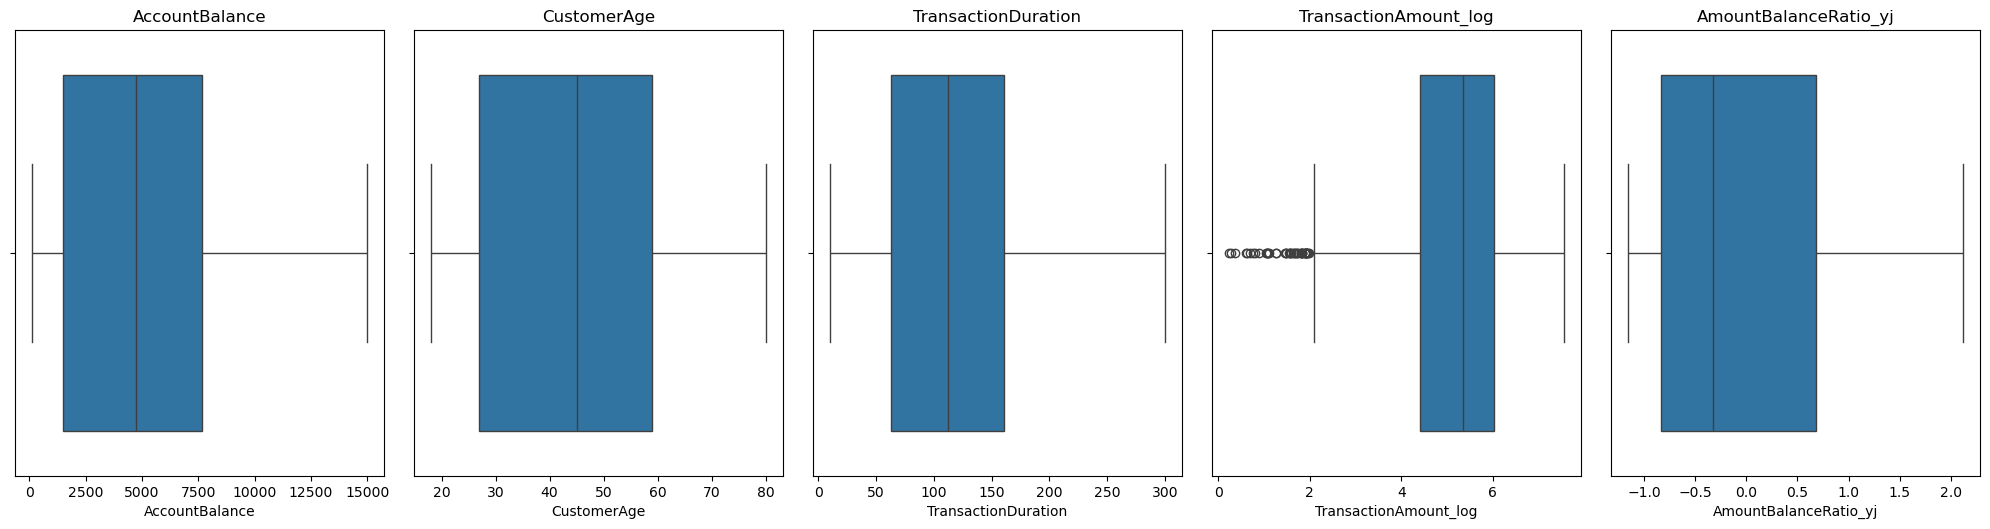

In [41]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_main_features_numerical_clean.columns):
    ax = fig.add_subplot(2, 5, i + 1)
    sns.boxplot(x=df_main_features_numerical[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_main_features_numerical_clean['TransactionAmount_log_scaled'] = scaler.fit_transform(
    df_main_features_numerical_clean[['TransactionAmount_log']]
)


In [43]:
df_main_features_numerical_clean = df_main_features_numerical_clean.drop(["TransactionAmount_log"], axis=1)

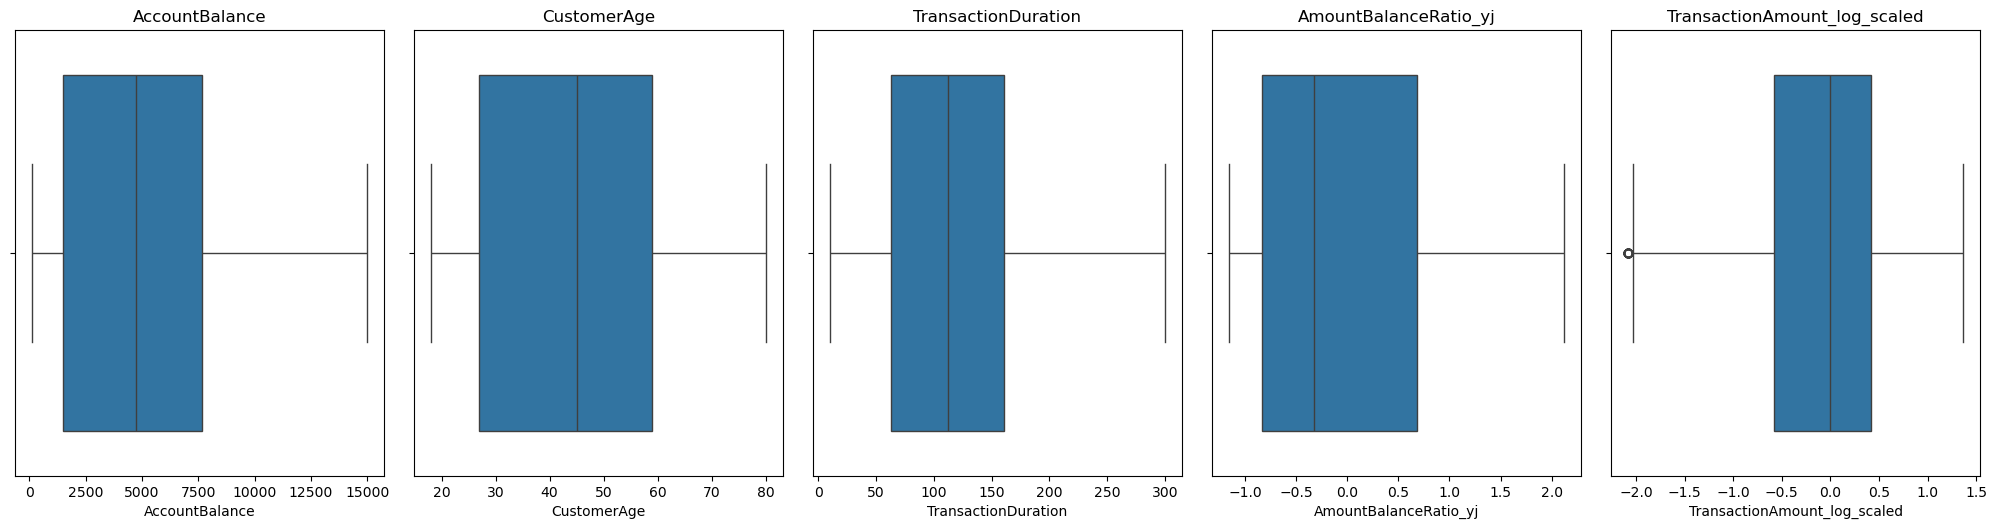

In [44]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_main_features_numerical_clean.columns):
    ax = fig.add_subplot(2, 5, i + 1)
    sns.boxplot(x=df_main_features_numerical_clean[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [45]:
df_main_features_numerical_clean.head()

,AccountBalance,CustomerAge,TransactionDuration,AmountBalanceRatio_yj,TransactionAmount_log_scaled
0,5112.21,70,81,-1.107502,-1.639611
1,13758.91,68,141,-0.683276,0.357072
2,1122.35,19,56,0.356475,-0.316841
3,8569.06,26,25,-0.777374,-0.083240
4,7429.40,26,198,-1.125266,-1.666494


In [46]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_main_features_numerical_clean_scaled = df_main_features_numerical_clean.copy()

df_main_features_numerical_clean_scaled = scaler.fit_transform(df_main_features_numerical_clean_scaled)

In [47]:
df_main_features_numerical_clean_scaled = pd.DataFrame(df_main_features_numerical_clean_scaled, columns=df_main_features_numerical_clean.columns)

In [48]:
df_main_features_numerical_clean_scaled.head()

,AccountBalance,CustomerAge,TransactionDuration,AmountBalanceRatio_yj,TransactionAmount_log_scaled
0,-0.000537,1.423718,-0.552443,-1.107502,-2.054911
1,2.216472,1.311287,0.305314,-0.683276,0.655236
2,-1.023534,-1.443277,-0.909842,0.356475,-0.259482
3,0.885797,-1.049768,-1.353017,-0.777374,0.057590
4,0.593589,-1.049768,1.120184,-1.125266,-2.091400


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
# sudah dilakukan di tahap preprocessing

In [49]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
df_main_features_categorical.head()

,TransactionType,Channel,MerchantID,Location,CustomerOccupation,MerchantTopN,LocationTopN
0,Debit,ATM,M015,San Diego,Doctor,OTHER,OTHER
1,Debit,ATM,M052,Houston,Doctor,OTHER,OTHER
2,Debit,Online,M009,Mesa,Student,OTHER,OTHER
3,Debit,Online,M002,Raleigh,Student,OTHER,OTHER
4,Credit,Online,M091,Atlanta,Student,OTHER,OTHER


In [50]:
df_main_features_categorical = df_main_features_categorical.drop(columns=["Location", "MerchantID"])

In [51]:
df_main_features_categorical.sample(5)

,TransactionType,Channel,CustomerOccupation,MerchantTopN,LocationTopN
515,Debit,ATM,Retired,OTHER,OTHER
1757,Credit,Online,Student,OTHER,OTHER
147,Debit,Online,Doctor,OTHER,OTHER
1997,Credit,Branch,Retired,OTHER,OTHER
1164,Credit,Branch,Doctor,OTHER,OTHER


In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_main_features_categorical = df_main_features_categorical.apply(le.fit_transform)

df_main_features_categorical.head()

,TransactionType,Channel,CustomerOccupation,MerchantTopN,LocationTopN
0,1,0,0,5,3
1,1,0,0,5,3
2,1,2,3,5,3
3,1,2,3,5,3
4,0,2,3,5,3


In [53]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df_main_features_categorical.columns.tolist()

['TransactionType',
 'Channel',
 'CustomerOccupation',
 'MerchantTopN',
 'LocationTopN']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# sudah dilakukan di tahap preprocessing

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
# sudah dilakukan di tahap preprocessing

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# sudah dilakukan di tahap preprocessing

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
# belom dilakukan, nanti dilain waktu

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [54]:
df_final = pd.concat([df_main_features_numerical_clean_scaled, df_main_features_categorical], axis=1)

df_final.head()

,AccountBalance,CustomerAge,TransactionDuration,AmountBalanceRatio_yj,TransactionAmount_log_scaled,TransactionType,Channel,CustomerOccupation,MerchantTopN,LocationTopN
0,-0.000537,1.423718,-0.552443,-1.107502,-2.054911,1,0,0,5,3
1,2.216472,1.311287,0.305314,-0.683276,0.655236,1,0,0,5,3
2,-1.023534,-1.443277,-0.909842,0.356475,-0.259482,1,2,3,5,3
3,0.885797,-1.049768,-1.353017,-0.777374,0.057590,1,2,3,5,3
4,0.593589,-1.049768,1.120184,-1.125266,-2.091400,0,2,3,5,3


In [55]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_final.describe()

,AccountBalance,CustomerAge,TransactionDuration,AmountBalanceRatio_yj,TransactionAmount_log_scaled,TransactionType,Channel,CustomerOccupation,MerchantTopN,LocationTopN
count,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,4.985396e-17,9.900078e-18,7.637203e-17,2.121445e-17,-1.697156e-17,0.773885,0.991242,1.510350,4.788217,2.916003
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,0.418398,0.809100,1.129548,0.849328,0.713771
min,-1.285344e+00,-1.499493e+00,-1.567456e+00,-1.158736e+00,-2.656685e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.255845e-01,-9.935526e-01,-8.097706e-01,-8.336050e-01,-6.206983e-01,1.000000,0.000000,0.000000,5.000000,3.000000
50%,-9.712227e-02,1.832826e-02,-1.021205e-01,-3.230633e-01,1.705736e-01,1.000000,1.000000,1.500000,5.000000,3.000000
75%,6.575405e-01,8.053467e-01,5.912336e-01,6.779460e-01,7.366264e-01,1.000000,2.000000,3.000000,5.000000,3.000000
max,2.529043e+00,1.985874e+00,2.578372e+00,2.122481e+00,2.025324e+00,1.000000,2.000000,3.000000,5.000000,5.000000


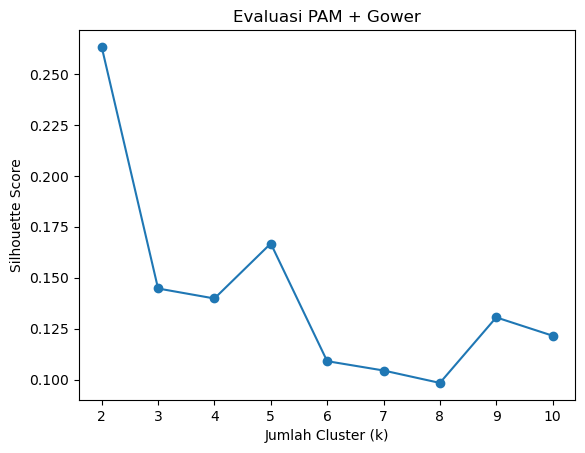

In [57]:
import gower
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

gower_dist = gower.gower_matrix(df_final)

silhouette_scores = []
K = range(2, 11)

for k in K:
    # 2. PAM/KMedoids dengan precomputed distance
    pam = KMedoids(n_clusters=k, metric="precomputed", random_state=42)
    labels = pam.fit_predict(gower_dist)

    # 3. Silhouette pakai distance matrix
    score = silhouette_score(gower_dist, labels, metric="precomputed")
    silhouette_scores.append(score)

# 4. Plot hasil silhouette score
import matplotlib.pyplot as plt

plt.plot(K, silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Evaluasi PAM + Gower")
plt.show()

In [61]:
import gower
from sklearn_extra.cluster import KMedoids

# ==== 1. Hitung jarak Gower ====
gower_dist = gower.gower_matrix(df_final)   # df_final = dataframe aslinya

# ==== 2. PAM dengan precomputed distance ====
k = 3
pam = KMedoids(n_clusters=k, metric="precomputed", random_state=42)
labels = pam.fit_predict(gower_dist)

df_final["Cluster"] = labels   # simpan label cluster ke dataframe

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [62]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
def cluster_summary_full_scaled(df, labels, cat_cols=None, num_cols=None):
    X = df.copy()
    X["Cluster"] = labels

    for cluster_id in sorted(X["Cluster"].unique()):
        cluster_data = X[X["Cluster"] == cluster_id]
        print("="*60)
        print(f"Cluster {cluster_id+1} (jumlah: {len(cluster_data)})")
        print("="*60)
        
        # Numerik (scaled)
        if num_cols:
            print("\n📊 Ringkasan fitur numerik (scaled):")
            print(cluster_data[num_cols].describe().T[['mean','std','min','max']].round(2))
        
        # Kategorikal
        if cat_cols:
            print("\n📂 Distribusi fitur kategorikal:")
            for col in cat_cols:
                dist = cluster_data[col].value_counts(normalize=True) * 100
                print(f"\n{col}:")
                print(dist.round(2).astype(str) + " %")


In [66]:
cluster_summary_full_scaled(
    df=df_final, 
    labels=labels,   # atau scaler chaining terakhir
    cat_cols=['TransactionType', 'Channel', 'CustomerOccupation', 'MerchantTopN', 'LocationTopN'],
    num_cols=['TransactionAmount_log_scaled', 'AccountBalance', 'CustomerAge', 'TransactionDuration']
)


Cluster 1 (jumlah: 803)

📊 Ringkasan fitur numerik (scaled):
                              mean   std   min   max
TransactionAmount_log_scaled  0.18  0.94 -2.66  1.99
AccountBalance                0.21  0.83 -1.28  2.53
CustomerAge                   0.19  0.77 -1.05  1.99
TransactionDuration          -0.46  0.84 -1.57  2.58

📂 Distribusi fitur kategorikal:

TransactionType:
TransactionType
1    77.58 %
0    22.42 %
Name: proportion, dtype: object

Channel:
Channel
1    35.24 %
2    34.12 %
0    30.64 %
Name: proportion, dtype: object

CustomerOccupation:
CustomerOccupation
1    43.46 %
0    32.13 %
2    24.28 %
3     0.12 %
Name: proportion, dtype: object

MerchantTopN:
MerchantTopN
5    92.65 %
4     1.74 %
0     1.62 %
2     1.49 %
1     1.37 %
3     1.12 %
Name: proportion, dtype: object

LocationTopN:
LocationTopN
3    85.55 %
1     3.24 %
0     2.99 %
4     2.86 %
5     2.86 %
2     2.49 %
Name: proportion, dtype: object
Cluster 2 (jumlah: 851)

📊 Ringkasan fitur numerik (scaled):

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

---

## 📊 Interpretasi Cluster

### 🔹 **Cluster 1 (803 nasabah, \~28%)**

* **Numerik (scaled)**

  * TransactionAmount\_log\_scaled = **0.18** → transaksi relatif **normal/menengah**.
  * AccountBalance = **0.21** → saldo sedikit **di atas rata-rata**.
  * CustomerAge = **0.19** → umur relatif **dewasa muda**.
  * TransactionDuration = **-0.46** → transaksi cenderung **cepat**.

* **Kategorikal**

  * TransactionType = **77% tipe 1** → mayoritas tipe transaksi tertentu (misalnya debit/kredit dominan).
  * Channel → **merata** (1: 35%, 2: 34%, 0: 31%) → mereka **pakai semua channel hampir sama rata**.
  * CustomerOccupation = banyak di **pekerjaan 1 (43%)** dan **0 (32%)**, ada variasi.
  * MerchantTopN = **92% top merchant (kategori 5)** → sangat loyal ke merchant besar/top.
  * LocationTopN = **86% lokasi 3** → terkonsentrasi di satu lokasi.

👉 **Interpretasi**: Nasabah cluster ini **middle spender**, saldo **cukup stabil**, transaksi cepat, dan **loyal ke satu merchant & satu lokasi**. Channel transaksi bervariasi. Bisa dianggap **nasabah rutin & loyalis merchant**.

---

### 🔹 **Cluster 2 (851 nasabah, \~29%)**

* **Numerik (scaled)**

  * TransactionAmount\_log\_scaled = **-0.41** → transaksi **lebih kecil dari rata-rata**.
  * AccountBalance = **0.68** → saldo **cukup tinggi**.
  * CustomerAge = **0.60** → relatif **lebih tua** dibanding cluster lain.
  * TransactionDuration = **0.51** → transaksi cenderung **lebih lama**.

* **Kategorikal**

  * TransactionType = **77% tipe 1** → sama dengan cluster 1.
  * Channel → **merata (35%, 34%, 31%)** → tidak ada dominasi channel.
  * CustomerOccupation = **42% pekerjaan 0**, **30% pekerjaan 2**, cukup beragam.
  * MerchantTopN = **92% top merchant (5)** → loyal ke merchant besar.
  * LocationTopN = **88% lokasi 3** → terkonsentrasi kuat di lokasi sama.

👉 **Interpretasi**: Nasabah ini **saldo besar**, transaksi nominal **relatif kecil tapi sering**, lebih **dewasa/tua**, transaksi **lebih lama**. Mereka **loyal ke merchant & lokasi tertentu**. Bisa dianggap **nasabah mapan, konservatif, dan konsisten**.

---

### 🔹 **Cluster 3 (858 nasabah, \~29%)**

* **Numerik (scaled)**

  * TransactionAmount\_log\_scaled = **0.24** → transaksi **lebih tinggi** dari cluster 1 & 2.
  * AccountBalance = **-0.87** → saldo relatif **rendah**.
  * CustomerAge = **-0.78** → relatif **lebih muda**.
  * TransactionDuration = **-0.07** → durasi transaksi **normal/cenderung cepat**.

* **Kategorikal**

  * TransactionType = **79% tipe 1** → mirip cluster lain.
  * Channel = cukup merata tapi sedikit lebih tinggi di **channel 0 (35%)**.
  * CustomerOccupation = **76% pekerjaan 3** → jelas **dominan satu jenis pekerjaan**.
  * MerchantTopN = **94% top merchant (5)** → sangat loyal.
  * LocationTopN = **86% lokasi 3**, lalu tersebar sedikit ke lokasi lain.

👉 **Interpretasi**: Nasabah ini **muda**, saldo **rendah**, tapi transaksi **cukup besar** (spender). Pekerjaan mayoritas **occupation 3**, sangat loyal ke merchant & lokasi. Bisa dianggap **nasabah muda high spender** tapi **low balance**.

---

## 📌 Kesimpulan Segmentasi

1. **Cluster 1 – Middle spender loyalis**: transaksi normal, saldo cukup, loyal ke merchant & lokasi, pakai semua channel.
2. **Cluster 2 – Nasabah mapan konservatif**: saldo besar, transaksi kecil, lebih tua, lambat, tetap loyal ke merchant/lokasi.
3. **Cluster 3 – Muda high spender, low balance**: transaksi lebih tinggi, saldo rendah, mayoritas occupation 3, loyal ke merchant/lokasi.

---



# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [68]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_final.head()

,AccountBalance,CustomerAge,TransactionDuration,AmountBalanceRatio_yj,TransactionAmount_log_scaled,TransactionType,Channel,CustomerOccupation,MerchantTopN,LocationTopN,Cluster
0,-0.000537,1.423718,-0.552443,-1.107502,-2.054911,1,0,0,5,3,1
1,2.216472,1.311287,0.305314,-0.683276,0.655236,1,0,0,5,3,1
2,-1.023534,-1.443277,-0.909842,0.356475,-0.259482,1,2,3,5,3,2
3,0.885797,-1.049768,-1.353017,-0.777374,0.057590,1,2,3,5,3,2
4,0.593589,-1.049768,1.120184,-1.125266,-2.091400,0,2,3,5,3,2


In [70]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
# Tambahin kolom target dulu
# Tentukan path tujuan
import os

save_path = "../data/09_hasil_clustering/cluster_target.csv"

# Pastikan foldernya ada
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Simpan hanya kolom target
df_final[["Cluster"]].to_csv(save_path, index=False)

print(f"✅ Hanya kolom Cluster disimpan ke {save_path}")

✅ Hanya kolom Cluster disimpan ke ../data/09_hasil_clustering/cluster_target.csv


In [72]:
df_dependent = pd.read_csv("../data/01_raw/bank_transactions_data_2.csv")
df_dependent.shape

(2512, 16)

In [73]:
df_independent = pd.read_csv("../data/09_hasil_clustering/cluster_target.csv")
df_independent.shape

(2512, 1)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.